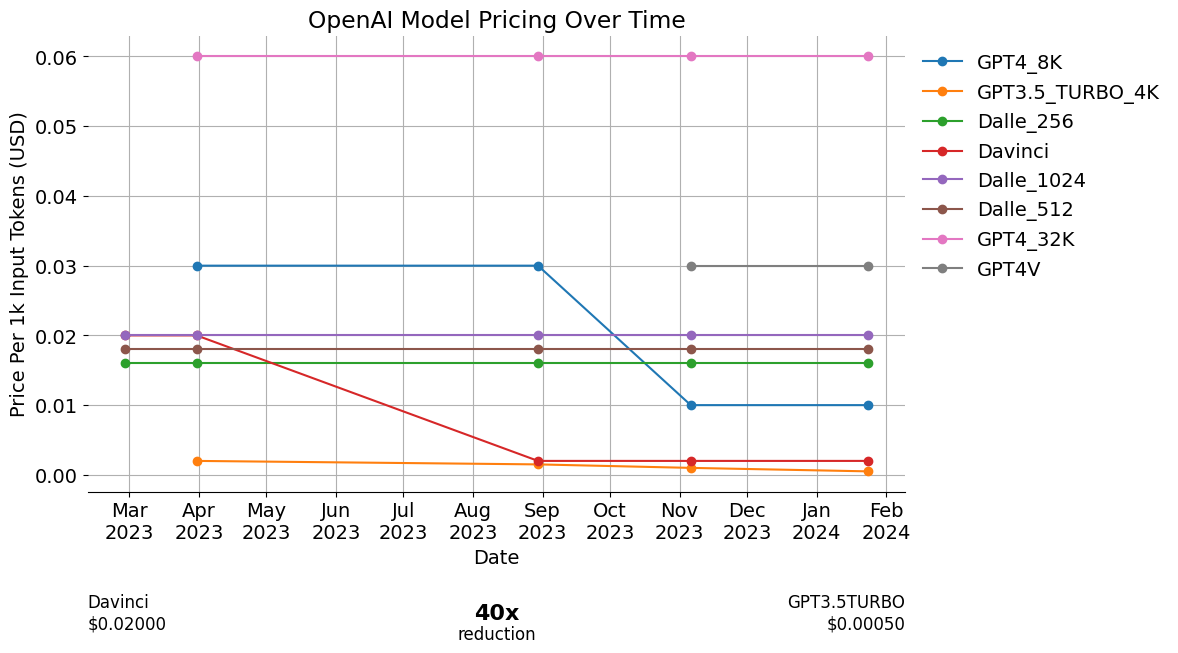

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from datetime import datetime
import os

# Set global font size
plt.rcParams.update({'font.size': 14})

# Input data
json_data = {
    "pricing_data": [
        {
            "date": "2023-02-27",
            "models": {
                "Davinci": 0.0200,
                "Dalle_1024": 0.020,
                "Dalle_512": 0.018,
                "Dalle_256": 0.016
            }
        },
        {
            "date": "2023-03-31",
            "models": {
                "Davinci": 0.0200,
                "GPT4_8K": 0.03,
                "GPT4_32K": 0.06,
                "GPT3.5_TURBO_4K": 0.002,
                "Dalle_1024": 0.020,
                "Dalle_512": 0.018,
                "Dalle_256": 0.016
            }
        },
        {
            "date": "2023-08-30",
            "models": {
                "Davinci": 0.0020,
                "GPT4_8K": 0.03,
                "GPT4_32K": 0.06,
                "GPT3.5_TURBO_4K": 0.0015,
                "Dalle_1024": 0.020,
                "Dalle_512": 0.018,
                "Dalle_256": 0.016
            }
        },
        {
            "date": "2023-11-06",
            "models": {
                "GPT4_8K": 0.01,
                "GPT4_32K": 0.06,
                "GPT4V": 0.03,
                "GPT3.5_TURBO_4K": 0.0010,
                "Dalle_1024": 0.020,
                "Dalle_512": 0.018,
                "Dalle_256": 0.016,
                "Davinci": 0.0020
            }
        },
        {
            "date": "2024-01-24",
            "models": {
                "GPT4_8K": 0.01,
                "GPT4_32K": 0.06,
                "GPT4V": 0.03,
                "GPT3.5_TURBO_4K": 0.0005,
                "Dalle_1024": 0.020,
                "Dalle_512": 0.018,
                "Dalle_256": 0.016,
                "Davinci": 0.0020
            }
        }
    ]
}

# Process the data
dates = []
all_models = set()
model_prices = {}

for entry in json_data["pricing_data"]:
    date = datetime.strptime(entry["date"], '%Y-%m-%d')
    dates.append(date)
    all_models.update(entry["models"].keys())
    model_prices[date] = entry["models"]

sorted_dates = sorted(dates)
sorted_models = {model: [] for model in all_models}

for date in sorted_dates:
    for model in all_models:
        price = model_prices[date].get(model)
        sorted_models[model].append(price)

# Create the plot
plt.figure(figsize=(12, 6))

for model, prices in sorted_models.items():
    plt.plot(sorted_dates, prices, label=model, marker='o')

# Format the plot
plt.xlabel('Date')
plt.ylabel('Price Per 1k Input Tokens (USD)')
plt.title('OpenAI Model Pricing Over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.grid(True)

# Remove unnecessary spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations below the chart
max_davinciprice = max(sorted_models['Davinci'])
minprice = min(price for prices in sorted_models.values() for price in prices if price is not None)
price_diff_mult = round(max_davinciprice / minprice, 0)

annotation_y = -0.6
left_x, right_x = ax.get_xlim()
middle_x = (left_x + right_x) / 2
y_offset = 110

# Add horizontal line
custom_line = mlines.Line2D([left_x, right_x], [annotation_y]*2,
                            transform=ax.get_yaxis_transform(),
                            color='black')
ax.add_artist(custom_line)

# Add annotations
plt.annotate(f'Davinci\n${max_davinciprice:.5f}',
             xy=(left_x, annotation_y), xycoords=('data', 'axes fraction'),
             xytext=(0, y_offset), textcoords='offset points',
             fontsize=12, va='center')

plt.annotate(f'{price_diff_mult:.0f}x',
             xy=(middle_x, annotation_y), xycoords=('data', 'axes fraction'),
             xytext=(0, y_offset), textcoords='offset points',
             fontsize=16, fontweight='bold', va='center', ha='center')

plt.annotate('reduction',
             xy=(middle_x, annotation_y), xycoords=('data', 'axes fraction'),
             xytext=(0, y_offset-15), textcoords='offset points',
             fontsize=12, va='center', ha='center')

plt.annotate(f'GPT3.5TURBO\n${minprice:.5f}',
             xy=(right_x, annotation_y), xycoords=('data', 'axes fraction'),
             xytext=(0, y_offset), textcoords='offset points',
             fontsize=12, va='center', ha='right')

# Save and show the plot
os.makedirs('data', exist_ok=True)
plt.savefig('data/oai_pricing.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()